# Exercises Evaluation Metrics

In [2]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from res.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

## Theoretical questions
> **Goal**: Evaluate classifiers to make sure that they are useful.

### Question 1:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual YES | 100           | 5            | 105   |
| Actual NO  | 10            | 50           | 60    |
| Total      | 110           | 55           | 165   |

- **NOTE**: 
    - YES = Positive
    - NO = Negative


- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Now calculate the accuracy, precision and recall.
     - Calculate the F1 measures and F1.5 measures.
     - What is the TPR and FPR? Compare with your recall. What do you determine?

In [93]:
# Load in data
confusion_matrix1 = pd.DataFrame(data=[[100, 5], [10, 50]], 
                                 columns=['Predicted YES', 'Predicted NO'], 
                                 index=['Actual YES', 'Actual NO'])
display(confusion_matrix1)

,Predicted YES,Predicted NO
Actual YES,100,5
Actual NO,10,50


In [94]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix1, 'Predicted YES')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# True Negatives (TN): The number of correct negative predictions.
print(colored(f"True Negatives (TN): {TN1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 100
True Negatives (TN): 50
False Positives (FP): 10
False Negatives (FN): 5


In [95]:
# Evaluating model
accuracy = accuracyf(confusion_matrix1)

precision_yes = precisionf(confusion_matrix1)[0]
precision_no = precisionf(confusion_matrix1)[1]

recall_yes = recallf(confusion_matrix1)[0]
recall_no = recallf(confusion_matrix1)[1]

f1_yes = f_measuref(confusion_matrix1, 1)[0]
f1_no = f_measuref(confusion_matrix1, 1)[1]

f15_yes = f_measuref(confusion_matrix1, 1.5)[0]
f15_no = f_measuref(confusion_matrix1, 1.5)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for yes is: {round(precision_yes, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for no is: {round(precision_no, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for yes is: {round(recall_yes, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for no is: {round(recall_no, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for yes is: {round(f1_yes, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for no is: {round(f1_no, 2) * 100}%\n", outputColor))

print(colored(f"The F1.5-measure of the binary classifier for yes is: {round(f15_yes, 2) * 100}%", outputColor))
print(colored(f"The F1.5-measure of the binary classifier for no is: {round(f15_no, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix1, 1, 0.9)

The accuracy of the classifier is: 91.0%

The precision of the classifier for yes is: 91.0%
The precision of the classifier for no is: 91.0%

The recall of the binary classifier for yes is: 95.0%
The recall of the binary classifier for no is: 83.0%

The F1-measure of the binary classifier for yes is: 93.0%
The F1-measure of the binary classifier for no is: 87.0%

The F1.5-measure of the binary classifier for yes is: 94.0%
The F1.5-measure of the binary classifier for no is: 86.0%

This is a bad classifier with a threshold of 90.0%


In [96]:
# Calculating the TPR, FPR and comparing it with the recall.
positiveratesf(confusion_matrix1)
print(colored(f"Recall Yes: {recall_yes}", outputColor))
print(colored(f"'TPF' is equal to the 'recall_yes'", outputColor))

TPR 0.9523809523809523
FPR 0.16666666666666666
Recall Yes: 0.9523809523809523
'TPF' is equal to the 'recall_yes'


### Question 2:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual A   | 100           | 0            | 100   |
| Actual B   | 50            | 5            | 55    |
| Total      | 150           | 5            | 155   |

- **NOTE**: 
    - YES = Positive
    - NO = Negative


- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Calculate the accuracy, precision and recall, and F1.
     - Is this a good classifier?

In [97]:
# Load in data
confusion_matrix2 = pd.DataFrame(data=[[100, 0], [50, 5]], 
                                 columns=['Predicted YES', 'Predicted NO'], 
                                 index=['Actual A', 'Actual B'])
display(confusion_matrix2)

,Predicted YES,Predicted NO
Actual A,100,0
Actual B,50,5


In [98]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix2, 'Predicted YES')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# True Negatives (TN): The number of correct negative predictions.
print(colored(f"True Negatives (TN): {TN1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 100
True Negatives (TN): 5
False Positives (FP): 50
False Negatives (FN): 0


In [99]:
# Evaluating model
accuracy = accuracyf(confusion_matrix2)

precision_yes = precisionf(confusion_matrix2)[0]
precision_no = precisionf(confusion_matrix2)[1]

recall_yes = recallf(confusion_matrix2)[0]
recall_no = recallf(confusion_matrix2)[1]

f1_yes = f_measuref(confusion_matrix2, 1)[0]
f1_no = f_measuref(confusion_matrix2, 1)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for yes is: {round(precision_yes, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for no is: {round(precision_no, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for yes is: {round(recall_yes, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for no is: {round(recall_no, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for yes is: {round(f1_yes, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for no is: {round(f1_no, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix2, 1, 0.9)

The accuracy of the classifier is: 68.0%

The precision of the classifier for yes is: 67.0%
The precision of the classifier for no is: 100.0%

The recall of the binary classifier for yes is: 100.0%
The recall of the binary classifier for no is: 9.0%

The F1-measure of the binary classifier for yes is: 80.0%
The F1-measure of the binary classifier for no is: 17.0%

This is a bad classifier with a threshold of 90.0%


### Question 3:
- In the table below you will find the confusion matrix of a multiclass classifier.

|            | Asfalt | Beton | Gras | Boom | Gebouw | Total |
|------------|--------|-------|------|------|--------|-------|
| Asfalt     | 2385   | 0     | 0    | 0    | 12     | 2397  |
| Beton      | 4      | 332   | 1    | 0    | 0      | 337   |
| Gras       | 0      | 0     | 908  | 0    | 0      | 908   |
| Boom       | 1      | 0     | 8    | 1084 | 6      | 1099  |
| Gebouw     | 4      | 1     | 0    | 9    | 2053   | 2067  |
| Total      | 2394   | 333   | 917  | 1093 | 2071   | 6808  |

- Beantwoord nu de volgende vragen:
    - What are the values for TP, FP, FN for the Grass class?
    - Now calculate the accuracy, precision and recall per class with these functions.
    - Is this a good classifier?


In [100]:
confusion_matrix3 = pd.DataFrame(data=[[2385, 0, 0, 0, 12], [4, 332, 1, 0, 0], [0, 0, 908, 0, 0], [1, 0, 8, 1084, 6], [4, 1, 0, 9, 2053]], 
                                 columns=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'], 
                                 index=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'])
display(confusion_matrix3)

,Asfalt,Beton,Gras,Boom,Gebouw
Asfalt,2385,0,0,0,12
Beton,4,332,1,0,0
Gras,0,0,908,0,0
Boom,1,0,8,1084,6
Gebouw,4,1,0,9,2053


In [101]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix3, 'Gras')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 908
False Positives (FP): 9
False Negatives (FN): 0


In [102]:
# Evaluating model
accuracy = accuracyf(confusion_matrix3)

precision_asfalt = precisionf(confusion_matrix3)[0]
precision_beton = precisionf(confusion_matrix3)[1]
precision_gras = precisionf(confusion_matrix3)[2]
precision_boom = precisionf(confusion_matrix3)[3]
precision_gebouw = precisionf(confusion_matrix3)[4]

recall_asfalt = recallf(confusion_matrix3)[0]
recall_beton = recallf(confusion_matrix3)[1]
recall_gras = recallf(confusion_matrix3)[2]
recall_boom = recallf(confusion_matrix3)[3]
recall_gebouw = recallf(confusion_matrix3)[4]

f1_asfalt = f_measuref(confusion_matrix3, 1)[0]
f1_beton = f_measuref(confusion_matrix3, 1)[1]
f1_gras = f_measuref(confusion_matrix3, 1)[2]
f1_boom = f_measuref(confusion_matrix3, 1)[3]
f1_gebouw = f_measuref(confusion_matrix3, 1)[4]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for asfalt is: {round(precision_asfalt, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for beton is: {round(precision_beton, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for gras is: {round(precision_gras, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for boom is: {round(precision_boom, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for gebouw is: {round(precision_gebouw, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for asfalt is: {round(recall_asfalt, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for beton is: {round(recall_beton, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for gras is: {round(recall_gras, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for boom is: {round(recall_boom, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for gebouw is: {round(recall_gebouw, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for asfalt is: {round(f1_asfalt, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for beton is: {round(f1_beton, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for gras is: {round(f1_gras, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for boom is: {round(f1_boom, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for gebouw is: {round(f1_gebouw, 2) * 100}%\n", outputColor))

The accuracy of the classifier is: 99.0%

The precision of the classifier for asfalt is: 100.0%
The precision of the classifier for beton is: 100.0%
The precision of the classifier for gras is: 99.0%
The precision of the classifier for boom is: 99.0%
The precision of the classifier for gebouw is: 99.0%

The recall of the binary classifier for asfalt is: 99.0%
The recall of the binary classifier for beton is: 99.0%
The recall of the binary classifier for gras is: 100.0%
The recall of the binary classifier for boom is: 99.0%
The recall of the binary classifier for gebouw is: 99.0%

The F1-measure of the binary classifier for asfalt is: 100.0%
The F1-measure of the binary classifier for beton is: 99.0%
The F1-measure of the binary classifier for gras is: 100.0%
The F1-measure of the binary classifier for boom is: 99.0%
The F1-measure of the binary classifier for gebouw is: 99.0%



In [103]:
evaluate_classifier(confusion_matrix3, 1, 0.9)

This is a good classifier with a threshold of 90.0%


### Question 4:
- Read the data in the file `..\Data\Simpsons_roc1` & `..\Data\Simpsons_roc2`. Do you notice any differences?
     - Use the `plot_roc` function to draw the ROC curve.
     - What is the best threshold value?
     - What is the AUC? What does it mean?
     - Apply the found threshold value to the `y_score` column (this column contains the results of a neural network predict_proba function) to create a new predicted column.


In [108]:
from IPython.display import display, HTML

# Load in data and filter data
simpsons_roc1 = pd.read_csv('../Data/Simpsons_roc1.csv', delimiter=',', decimal='.')
simpsons_roc2 = pd.read_csv('../Data/Simpsons_roc2.csv', delimiter=',', decimal='.')

# Create HTML code
combined_html = f"""
<table>
    <tr>
        <p>----------Simpsons Roc 1--------------------Simpsons Roc 2----------</p>
        <td>{simpsons_roc1.to_html()}</td>
        <td>{simpsons_roc2.to_html()}</td>
    </tr>
</table>
"""
print(colored(f"They are practically the same.", outputColor))
display(HTML(combined_html))

They are practically the same.


,y_true,y_score
0,0,0.001611
1,1,0.568856
2,0,0.224951
3,1,0.678186
4,1,0.780744
5,0,0.030405
6,1,0.431997
7,0,0.346567
8,0,0.102228
,y_true,y_score


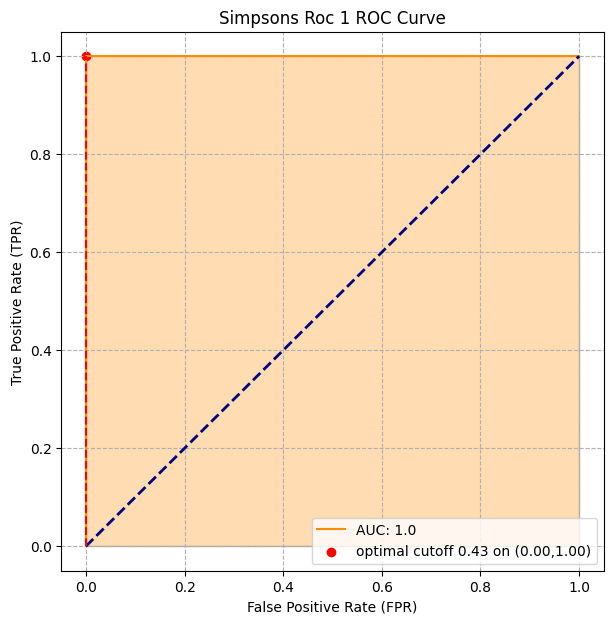

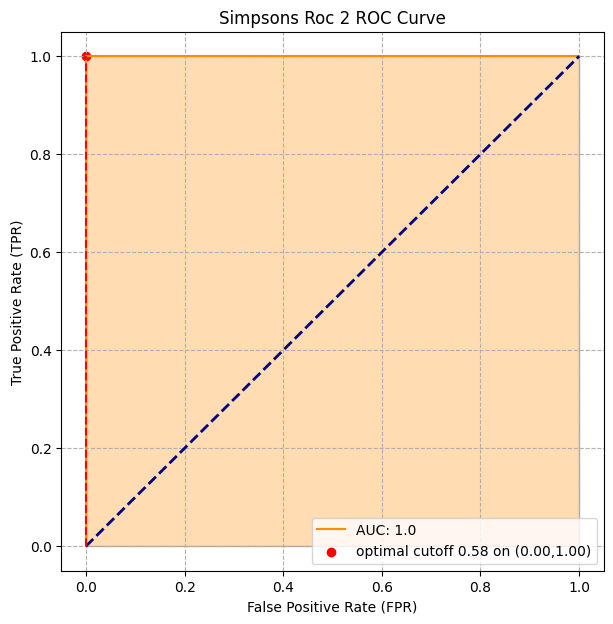

In [113]:
# Plot ROC curve for Simpsons Roc 1 & 2
plot_rocf(y_true=simpsons_roc1['y_true'], y_score=simpsons_roc1['y_score'], title='Simpsons Roc 1 ROC Curve')
plot_rocf(y_true=simpsons_roc2['y_true'], y_score=simpsons_roc2['y_score'], title='Simpsons Roc 2 ROC Curve')

In [110]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
best_threshold2 = find_best_threshold(simpsons_roc2['y_true'], simpsons_roc2['y_score'])

# Based Threshold Value: The threshold value that gives the best results for a specific metric.
print(colored(f"The best threshold value for Simpsons Roc 1 is: {round(best_threshold1 * 100, 2)}%", outputColor))
print(colored(f"The best threshold value for Simpsons Roc 2 is: {round(best_threshold2 * 100, 2)}%\n", outputColor))

if best_threshold1 > best_threshold2:
    print(colored(f"Simpsons Roc 1 has a higher threshold value than Simpsons Roc 2.\n", outputColor))
elif best_threshold1 < best_threshold2:
    print(colored(f"Simpsons Roc 2 has a higher threshold value than Simpsons Roc 1.\n", outputColor))
else:
    print(colored(f"The threshold values are the same.\n", outputColor))

# Calculate AUC (Area Under Curve)
auc1 = roc_auc_score(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
auc2 = roc_auc_score(simpsons_roc2['y_true'], simpsons_roc2['y_score'])

# Area Under Curve: If the binary classifier can distinguish the two better, the number is higher.
print(colored(f"The AUC for Simpsons Roc 1 is: {round(auc1, 2)}%", outputColor))
print(colored(f"The AUC for Simpsons Roc 2 is: {round(auc2, 2)}%\n", outputColor))

if auc1 > auc2:
    print(colored(f"Simpsons Roc 1 has a higher AUC value than Simpsons Roc 2.\n", outputColor))
elif auc1 < auc2:
    print(colored(f"Simpsons Roc 2 has a higher AUC value than Simpsons Roc 1.\n", outputColor))
else:
    print(colored(f"The AUC values are the same.\n", outputColor))

The best threshold value for Simpsons Roc 1 is: 43.2%
The best threshold value for Simpsons Roc 2 is: 57.64%

Simpsons Roc 2 has a higher threshold value than Simpsons Roc 1.

The AUC for Simpsons Roc 1 is: 1.0%
The AUC for Simpsons Roc 2 is: 1.0%

The AUC values are the same.



In [112]:
# Apply threshold value to y_score column
simpsons_roc1['y_pred'] = simpsons_roc1['y_score'].apply(lambda x: 1 if x > best_threshold1 else 0)
simpsons_roc2['y_pred'] = simpsons_roc2['y_score'].apply(lambda x: 1 if x > best_threshold2 else 0)

# Calculate accuracy of prediction
accuracy1 = np.mean(simpsons_roc1['y_true'] == simpsons_roc1['y_pred'])
accuracy2 = np.mean(simpsons_roc2['y_true'] == simpsons_roc2['y_pred'])
print(colored(f"The accuracy of the ANN for Simpsons Roc 1 is: {round(accuracy1, 2) * 100}%\n", outputColor))
print(colored(f"The accuracy of the ANN for Simpsons Roc 2 is: {round(accuracy2, 2) * 100}%\n", outputColor))

# Show prediction
combined_html = f"""
<table>
    <tr>
        <p>---------------Simpsons Roc 1-----------------------------------Simpsons Roc 2---------------</p>
        <td>{simpsons_roc1.to_html()}</td>
        <td>{simpsons_roc2.to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

The accuracy of the ANN for Simpsons Roc 1 is: 89.0%

The accuracy of the ANN for Simpsons Roc 2 is: 89.0%



,y_true,y_score,y_pred
0,0,0.001611,0
1,1,0.568856,1
2,0,0.224951,0
3,1,0.678186,1
4,1,0.780744,1
5,0,0.030405,0
6,1,0.431997,0
7,0,0.346567,0
8,0,0.102228,0
,y_true,y_score,y_pred


### Question 5:
- Two linear discriminant analysis models were built with the dataset infert. The results of the predictions can be found in the files `Education_roc1.csv` and `Education_roc2.csv`.
    - Load both datasets.
    - Use the `plot_roc` function to plot both ROC curves. For both data sets, use column `6-11yrs` as the `y-score` and transform the column `y_true` into 1 for the values `6-11yrs` and a 0 for the other values.
    - What is the best threshold value for each of the ROC curves?
    - Which model do you prefer?

In [116]:
from IPython.display import display, HTML

# Load in data and filter data
education_roc1 = pd.read_csv('../Data/Education_roc1.csv', delimiter=',', decimal='.')
education_roc2 = pd.read_csv('../Data/Education_roc2.csv', delimiter=',', decimal='.')

# Create HTML code
combined_html = f"""
<table>
    <tr>
        <p>--------------------Education Roc 1-------------------------Education Roc 2--------------------</p>
        <td>{education_roc1.head().to_html()}</td>
        <td>{education_roc2.head().to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

,12+ yrs,6-11yrs,y_true
0,0.337185,0.662815,6-11yrs
1,0.275267,0.724733,6-11yrs
2,0.766077,0.233923,6-11yrs
3,0.468015,0.531985,6-11yrs
4,0.808740,0.191260,6-11yrs
,12+ yrs,6-11yrs,y_true
0,0.0,1.0,6-11yrs
1,0.0,1.0,6-11yrs
2,0.0,1.0,6-11yrs
3,0.0,1.0,6-11yrs


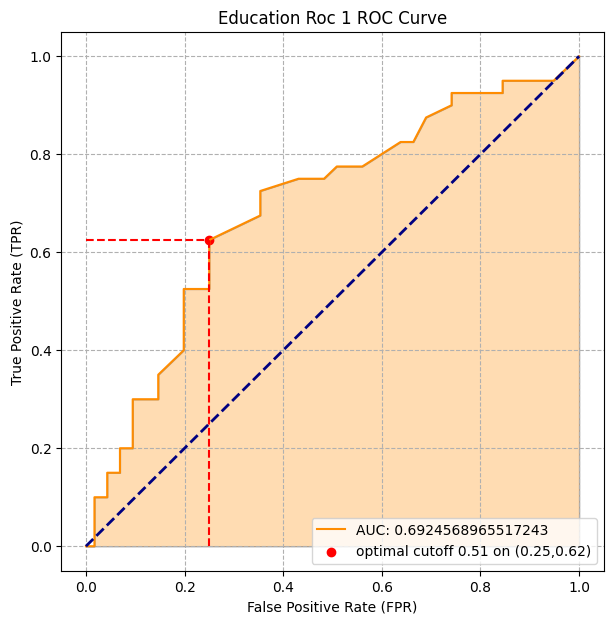

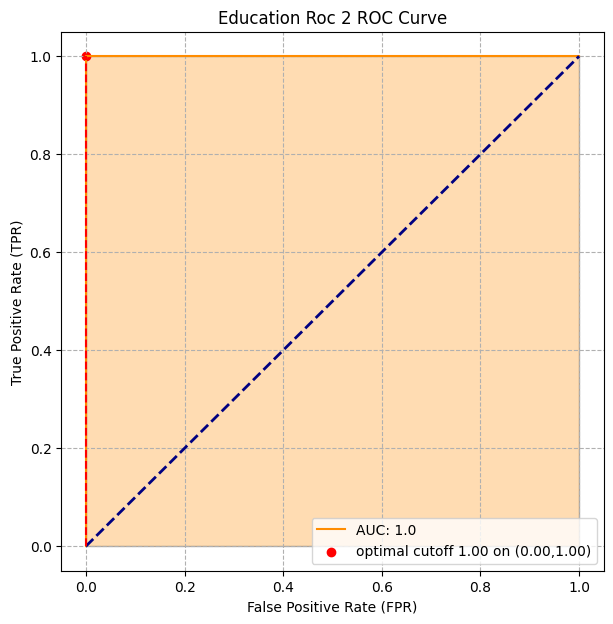

In [117]:
# Transform data set
education_roc1['y_true'] = education_roc1['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)
education_roc2['y_true'] = education_roc2['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)

# Plot ROC curve for Education Roc 1 & 2
plot_rocf(y_true=education_roc1['y_true'], y_score=education_roc1['6-11yrs'], title='Education Roc 1 ROC Curve')
plot_rocf(y_true=education_roc2['y_true'], y_score=education_roc2['6-11yrs'], title='Education Roc 2 ROC Curve')

In [121]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(education_roc1['y_true'], education_roc1['6-11yrs'])
best_threshold2 = find_best_threshold(education_roc2['y_true'], education_roc2['6-11yrs'])

# Based Threshold Value: The threshold value that gives the best results for a specific metric.
print(colored(f"The best threshold value for Education Roc 1 is: {round(best_threshold1 * 100, 2)}%", outputColor))
print(colored(f"The best threshold value for Education Roc 2 is: {round(best_threshold2 * 100, 2)}%\n", outputColor))

if best_threshold1 > best_threshold2:
    print(colored(f"Education Roc 1 has a higher threshold value than Education Roc 2.\n", outputColor))
elif best_threshold1 < best_threshold2:
    print(colored(f"Education Roc 2 has a higher threshold value than Education Roc 1.\n", outputColor))
else:
    print(colored(f"The threshold values are the same.\n", outputColor))

The best threshold value for Education Roc 1 is: 47.73%
The best threshold value for Education Roc 2 is: 100.0%

Education Roc 2 has a higher threshold value than Education Roc 1.



In [119]:
# Apply threshold value to y_score column
education_roc1['y_pred'] = education_roc1['6-11yrs'].apply(lambda x: 1 if x > best_threshold1 else 0)
education_roc2['y_pred'] = education_roc2['6-11yrs'].apply(lambda x: 1 if x > best_threshold2 else 0)

# Calculate accuracy of prediction
accuracy1 = np.mean(education_roc1['y_true'] == education_roc1['6-11yrs'])
accuracy2 = np.mean(education_roc2['y_true'] == education_roc2['6-11yrs'])
print(colored(f"The accuracy of the ANN for Education Roc 1 is: {round(accuracy1, 2) * 100}%\n", outputColor))
print(colored(f"The accuracy of the ANN for Education Roc 2 is: {round(accuracy2, 2) * 100}%\n", outputColor))

if accuracy1 > accuracy2:
    print(colored(f"Education Roc 1 has a higher accuracy than Education Roc 2.\n", outputColor))
elif accuracy1 < accuracy2:
    print(colored(f"Education Roc 2 has a higher accuracy than Education Roc 1.\n", outputColor))
else:
    print(colored(f"The accuracy values are the same.\n", outputColor))

# Show prediction
combined_html = f"""
<table>
    <tr>
        <p>--------------------Education Roc 1-------------------------Education Roc 2--------------------</p>
        <td>{education_roc1.head().to_html()}</td>
        <td>{education_roc2.head().to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

The accuracy of the ANN for Education Roc 1 is: 0.0%

The accuracy of the ANN for Education Roc 2 is: 51.0%

Education Roc 2 has a higher accuracy than Education Roc 1.



,12+ yrs,6-11yrs,y_true,y_pred
0,0.337185,0.662815,1,1
1,0.275267,0.724733,1,1
2,0.766077,0.233923,1,0
3,0.468015,0.531985,1,1
4,0.808740,0.191260,1,0
,12+ yrs,6-11yrs,y_true,y_pred
0,0.0,1.0,1,0
1,0.0,1.0,1,0
2,0.0,1.0,1,0
3,0.0,1.0,1,0
